In [1]:
import pandas as pd

df = pd.read_csv('./data/merged_df3.csv')

In [3]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,aisle_id,department_id,department,aisle,recency,frequency,monetary,rfm_score,cluster,category
0,431534,1,prior,5,4,15,28,196,1,1,...,77,7,beverages,soft drinks,28,5,8,10.8,0,일반 고객
1,431534,1,prior,5,4,15,28,12427,2,1,...,23,19,snacks,popcorn jerky,28,5,8,10.8,0,일반 고객
2,431534,1,prior,5,4,15,28,10258,3,1,...,117,19,snacks,nuts seeds dried fruit,28,5,8,10.8,0,일반 고객
3,431534,1,prior,5,4,15,28,25133,4,1,...,21,16,dairy eggs,packaged cheese,28,5,8,10.8,0,일반 고객
4,431534,1,prior,5,4,15,28,10326,5,0,...,24,4,produce,fresh fruits,28,5,8,10.8,0,일반 고객


### 고객등급별 재주문율 구하기

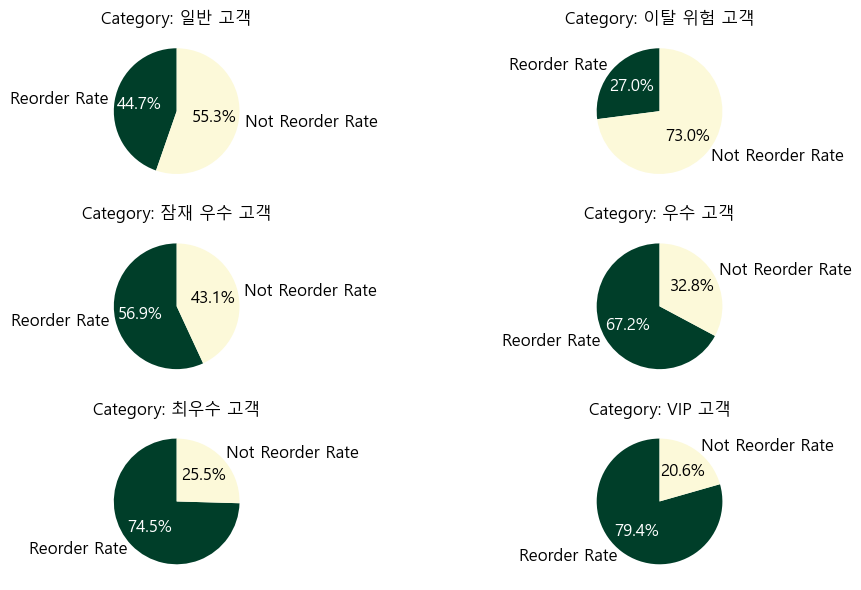

In [27]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (맑은 고딕)
plt.rc('font', family='Malgun Gothic')

# 서브플롯 크기 설정 (3x2)
fig, axes = plt.subplots(3, 2, figsize=(10, 6))
axes = axes.flatten()  # 서브플롯을 1차원 배열로 변환

# 카테고리별로 반복
for idx, i in enumerate(df['category'].unique()):

    cate_df = df[df['category'] == i]
    a = cate_df['reordered'].shape[0]
    b = cate_df[cate_df['reordered'] == 1].shape[0]

    reorder_rate = b / a
    not_reorder_rate = 1 - reorder_rate

    data = [reorder_rate, not_reorder_rate]
    labels = ['Reorder Rate', 'Not Reorder Rate']

    # 각 서브플롯에 파이 차트 그리기
    wedges, texts, autotexts = axes[idx].pie(
        data, labels=labels, autopct='%1.1f%%',
        colors=['#003E29', '#fcf9d9'], startangle=90,
        textprops={'fontsize': 12}
    )

    # 텍스트 색상 설정
    autotexts[0].set_color('white')  # Reorder Rate의 텍스트 색상
    autotexts[1].set_color('black')  # Not Reorder Rate의 텍스트 색상

    axes[idx].set_title(f'Category: {i}')
    
# 남은 빈 서브플롯 숨기기
for j in range(idx + 1, 6):
    axes[j].axis('off')

# 서브플롯 간 여백 조정
plt.tight_layout()
plt.show()

### 고객등급별 한 번 주문할 때 몇 개의 물건 담는지 확인
- 이탈 위험 고객 제외한 나머지는 한 번 주문할 때 평균 10개 이내로 구매를 하지만 이탈 위험 고객은 매우 소량만 구매하는 것을 확인 할 수 있습니다.

In [37]:
for i in df['category'].unique():
    cate_df = df[df['category'] == i]
    print(i)
    add_to_cart_count = cate_df.groupby('order_id')['add_to_cart_order'].max().reset_index()
    print('주문 시 담는 평균 개수:', round(add_to_cart_count['add_to_cart_order'].mean(), 2))

일반 고객
주문 시 담는 평균 개수: 8.2
이탈 위험 고객
주문 시 담는 평균 개수: 5.37
잠재 우수 고객
주문 시 담는 평균 개수: 10.36
우수 고객
주문 시 담는 평균 개수: 11.5
최우수 고객
주문 시 담는 평균 개수: 13.07
VIP 고객
주문 시 담는 평균 개수: 18.29


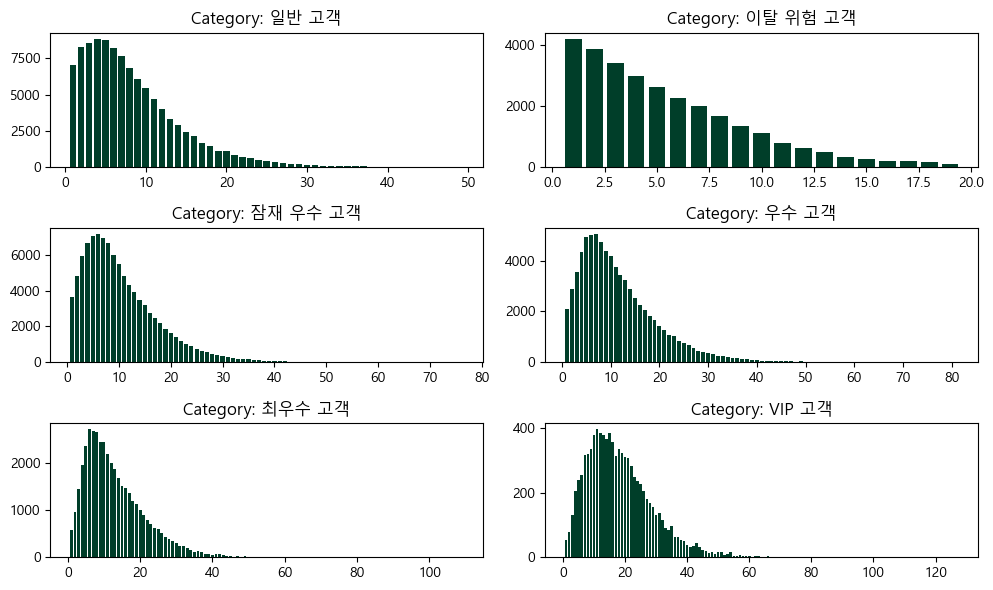

In [29]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (맑은 고딕)
plt.rc('font', family='Malgun Gothic')

# 서브플롯 크기 설정 (3x2)
fig, axes = plt.subplots(3, 2, figsize=(10, 6))
axes = axes.flatten()  # 서브플롯을 1차원 배열로 변환

# 카테고리별로 반복
for idx, i in enumerate(df['category'].unique()):

    cate_df = df[df['category'] == i]
    add_to_cart_count = cate_df.groupby('order_id')['add_to_cart_order'].max().reset_index()
    count_df = add_to_cart_count['add_to_cart_order'].value_counts().reset_index().sort_values(by='add_to_cart_order')
    axes[idx].bar(count_df['add_to_cart_order'], count_df['count'], color='#003E29', width=0.8)
    axes[idx].set_title(f'Category: {i}')

# 남은 빈 서브플롯 숨기기
for j in range(idx + 1, 6):
    axes[j].axis('off')

# 서브플롯 간 여백 조정
plt.tight_layout()
plt.show()

### 최소 100번 이상 재구매했을 경우를 확인
- 이러한 기준을 세우지 않는다면 장바구니 넣는 순서가 80번째인데 기록이 하나밖에 없으면서 재구매를 했다고 하면 100%라 나오기 때문에 의미없는 숫자라 판단
- 기준을 최소 100번 이상 구매한 것으로 설정
- 재구매율이 낮아짐.

In [82]:
cart_order_reordered=df.groupby('add_to_cart_order')['reordered'].sum()

In [84]:
cart_order_reordered

add_to_cart_order
1      245430
2      233675
3      213667
4      191822
5      170491
        ...  
123         0
124         0
125         0
126         0
127         0
Name: reordered, Length: 127, dtype: int64

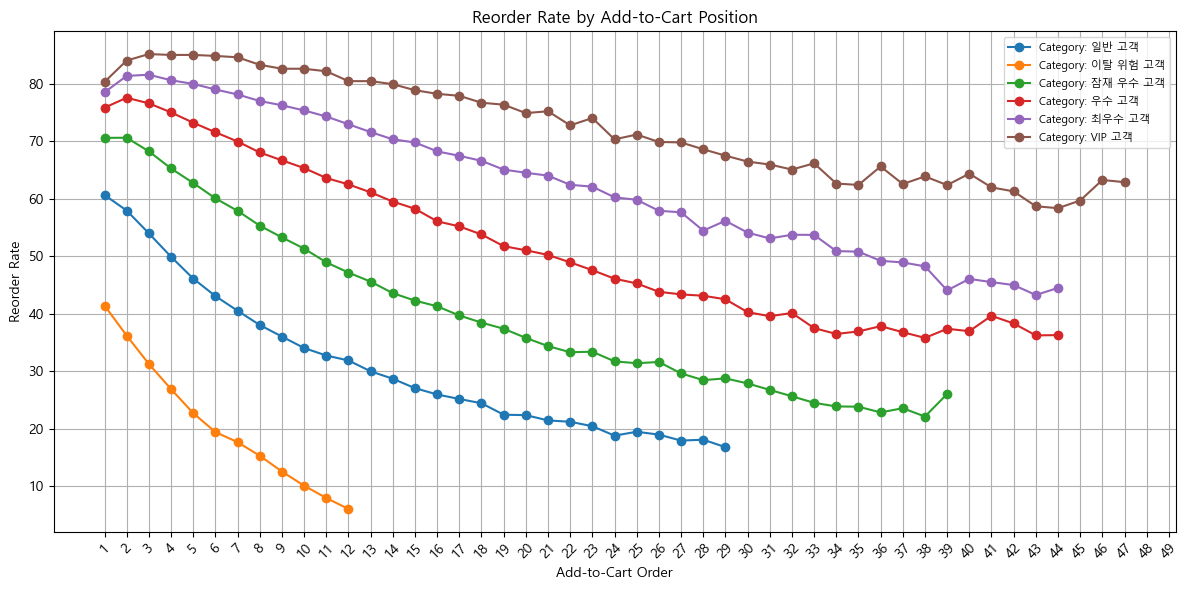

In [90]:
import matplotlib.pyplot as plt

# 한글 폰트 설정 (맑은 고딕)
plt.rc('font', family='Malgun Gothic')

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 카테고리별로 반복
for i in df['category'].unique():
    cate_df = df[df['category'] == i]
    # 카트에 넣는 순서 기준으로 재주문 되는 횟수 측정
    cart_order_reordered=cate_df.groupby('add_to_cart_order')['reordered'].sum()
    
    # 재주문 비율 계산
    cart_order_reordered_rate = cate_df.groupby('add_to_cart_order')['reordered'].mean() * 100
    
    # 재주문 횟수가 100개 이상인 카트 넣는 숫자들만 가져오기
    cart_order_reordered_rate = cart_order_reordered_rate[cart_order_reordered_rate.index <= cart_order_reordered[cart_order_reordered.values >= 100].index[-1]]
    # 그래프 그리기
    plt.plot(cart_order_reordered_rate.index, cart_order_reordered_rate.values, marker='o', linestyle='-', label=f'Category: {i}')

# 그래프 제목 및 축 레이블 설정
plt.xlabel("Add-to-Cart Order")
plt.ylabel("Reorder Rate")
plt.title("Reorder Rate by Add-to-Cart Position")
plt.xticks(range(1, 50), rotation=45)
# 범례 표시
plt.legend(fontsize=8)
plt.grid()
# 그래프 간 여백 조정
plt.tight_layout()
plt.show()


### 고객 등급별 구매 주기 확인
- 구매 주기 확인 결과 모두 동일한 것으로 확인 되었습니다.

In [55]:
df['category'].value_counts().to_frame()

,count
category,
잠재 우수 고객,1038684
우수 고객,872375
일반 고객,863058
최우수 고객,565726
VIP 고객,167033
이탈 위험 고객,154245


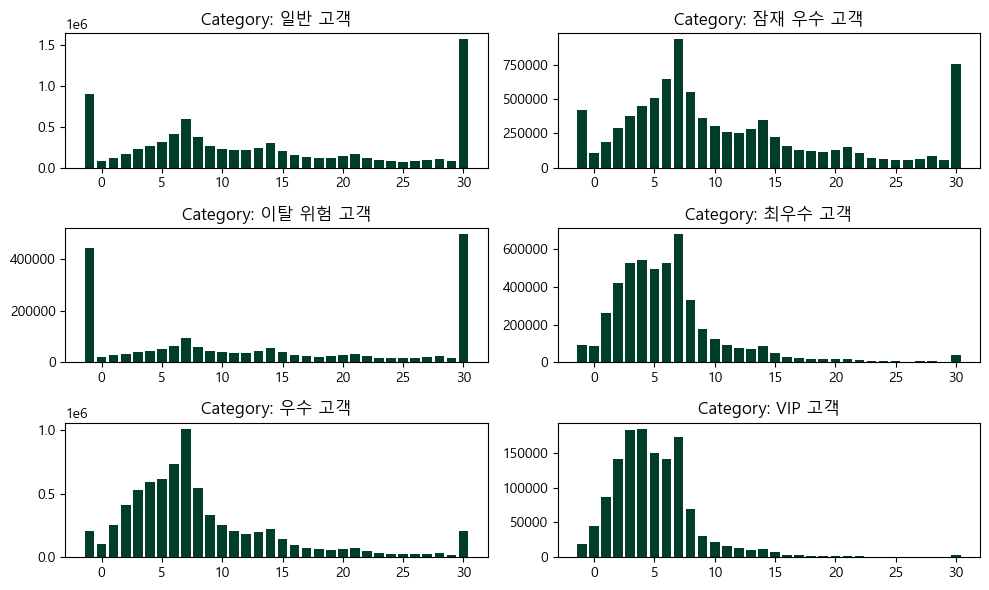

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (맑은 고딕)
plt.rc('font', family='Malgun Gothic')

# 서브플롯 크기 설정 (3x2)
fig, axes = plt.subplots(3, 2, figsize=(10, 6))
axes = axes.flatten()  # 서브플롯을 1차원 배열로 변환

# 카테고리별로 반복
for idx, i in enumerate(df['category'].unique()):

    cate_df = df[df['category'] == i]
    count_df = cate_df['days_since_prior_order'].value_counts().reset_index().sort_values(by='days_since_prior_order')
    axes[idx].bar(count_df['days_since_prior_order'], count_df['count'], color='#003E29', width=0.8)
    axes[idx].set_title(f'Category: {i}')
    # axes[idx].set_ylim(0, 200000)
# 남은 빈 서브플롯 숨기기
for j in range(idx + 1, 6):
    axes[j].axis('off')

# 서브플롯 간 여백 조정
plt.tight_layout()
plt.show()

### 고객 등급별 구매 물품 확인
- 모두 똑같이 produce가 제일 많ㅎ은 것으로 확인 그리고 거의 대부분 동일한 것으로 확인됨.

In [79]:
df['days_since_prior_order'].value_counts()

days_since_prior_order
7     392448
30    345457
6     284097
0     284059
5     240449
4     232529
8     217504
3     212140
2     166063
9     138121
14    119153
10    111013
1     105615
13     96880
11     93711
12     85761
15     76678
16     52942
21     49681
20     42974
17     42198
18     39616
19     38188
22     34900
28     28646
23     25822
24     22736
27     22573
25     20260
26     19612
29     19295
Name: count, dtype: int64

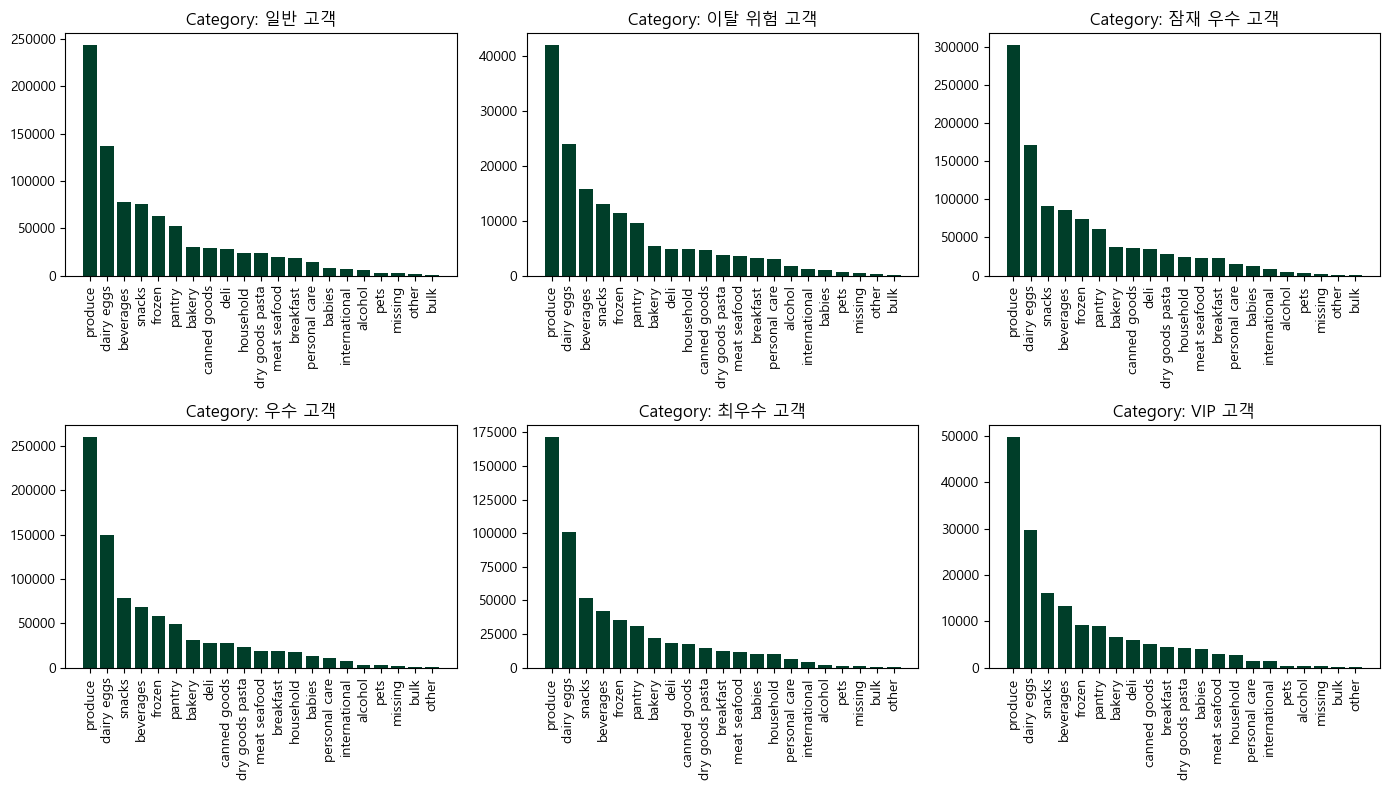

In [85]:
# 한글 폰트 설정 (맑은 고딕)
plt.rc('font', family='Malgun Gothic')

# 서브플롯 크기 설정 (3x2)
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()  # 서브플롯을 1차원 배열로 변환

# 카테고리별로 반복
for idx, i in enumerate(df['category'].unique()):

    cate_df = df[df['category'] == i]
    dept_df = cate_df['department'].value_counts().reset_index()
    axes[idx].bar(dept_df['department'], dept_df['count'], color='#003E29', width=0.8)
    axes[idx].set_title(f'Category: {i}')
    axes[idx].tick_params(axis='x', rotation=90)

# 남은 빈 서브플롯 숨기기
for j in range(idx + 1, 6):
    axes[j].axis('off')

# 서브플롯 간 여백 조정
plt.tight_layout()
plt.show()

### 고객 등급별로 어떤 물품의 재구매율이 높은지 확인
- 특이하게도 일반 고객과 이탈 위험 고객의 재구매율이 높은 department는 alcohol과 beverages(음료)들로 확인 되었습니다.

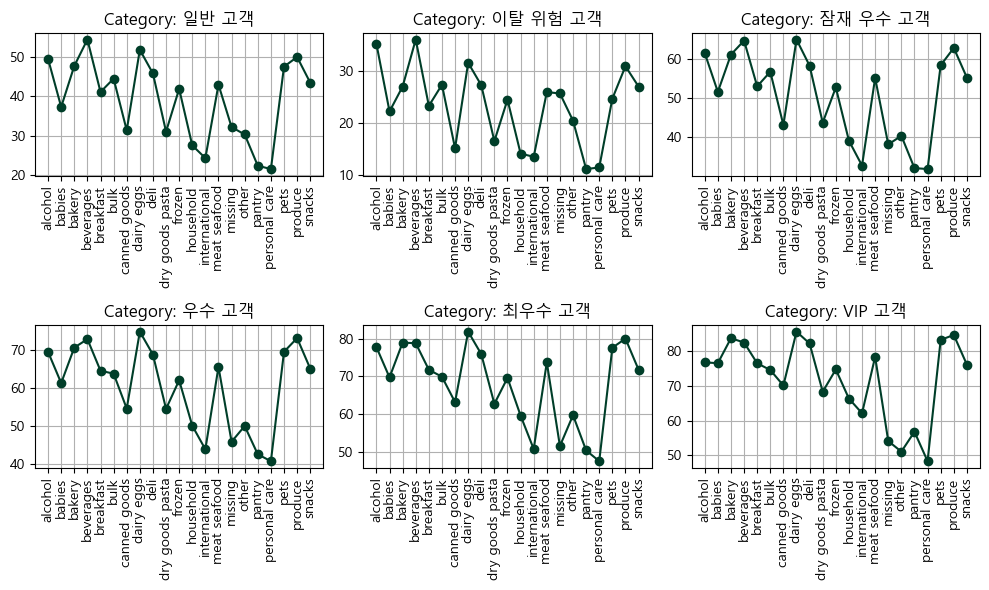

In [95]:
# 한글 폰트 설정 (맑은 고딕)
plt.rc('font', family='Malgun Gothic')

# 서브플롯 크기 설정 (3x2)
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()  # 서브플롯을 1차원 배열로 변환

# 카테고리별로 반복
for idx, i in enumerate(df['category'].unique()):

    cate_df = df[df['category'] == i]
    dept_reordered_df = cate_df.groupby('department')['reordered'].mean() * 100
    axes[idx].plot(dept_reordered_df.index, dept_reordered_df.values, color='#003E29', marker='o')
    axes[idx].set_title(f'Category: {i}')
    axes[idx].tick_params(axis='x', rotation=90)
    axes[idx].grid()
# 남은 빈 서브플롯 숨기기
for j in range(idx + 1, 6):
    axes[j].axis('off')

# 서브플롯 간 여백 조정
plt.tight_layout()
plt.show()

### 고객 등급 별로 주문 수 확인

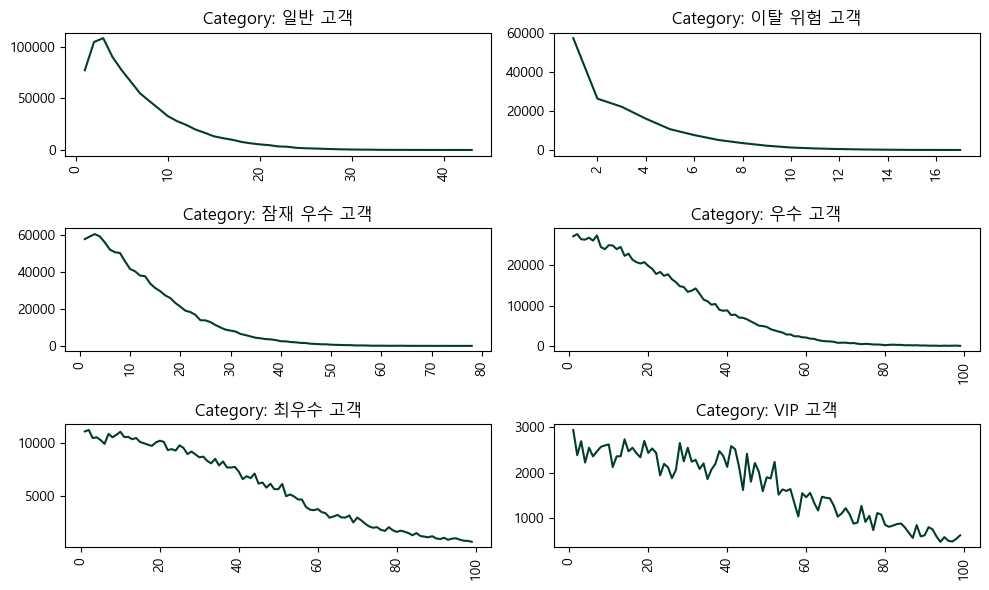

In [105]:
# 한글 폰트 설정 (맑은 고딕)
plt.rc('font', family='Malgun Gothic')

# 서브플롯 크기 설정 (3x2)
fig, axes = plt.subplots(3, 2, figsize=(10, 6))
axes = axes.flatten()  # 서브플롯을 1차원 배열로 변환

# 카테고리별로 반복
for idx, i in enumerate(df['category'].unique()):

    cate_df = df[df['category'] == i]
    order_max_df = cate_df.groupby('order_number')['order_number'].count().reset_index(name='count')
    axes[idx].plot(order_max_df['order_number'], order_max_df['count'], color='#003E29')
    axes[idx].set_title(f'Category: {i}')
    axes[idx].tick_params(axis='x', rotation=90)

# 남은 빈 서브플롯 숨기기
for j in range(idx + 1, 6):
    axes[j].axis('off')

# 서브플롯 간 여백 조정
plt.tight_layout()
plt.show()

### 요일과 시간에 따른 고객별 구매 패턴 확인

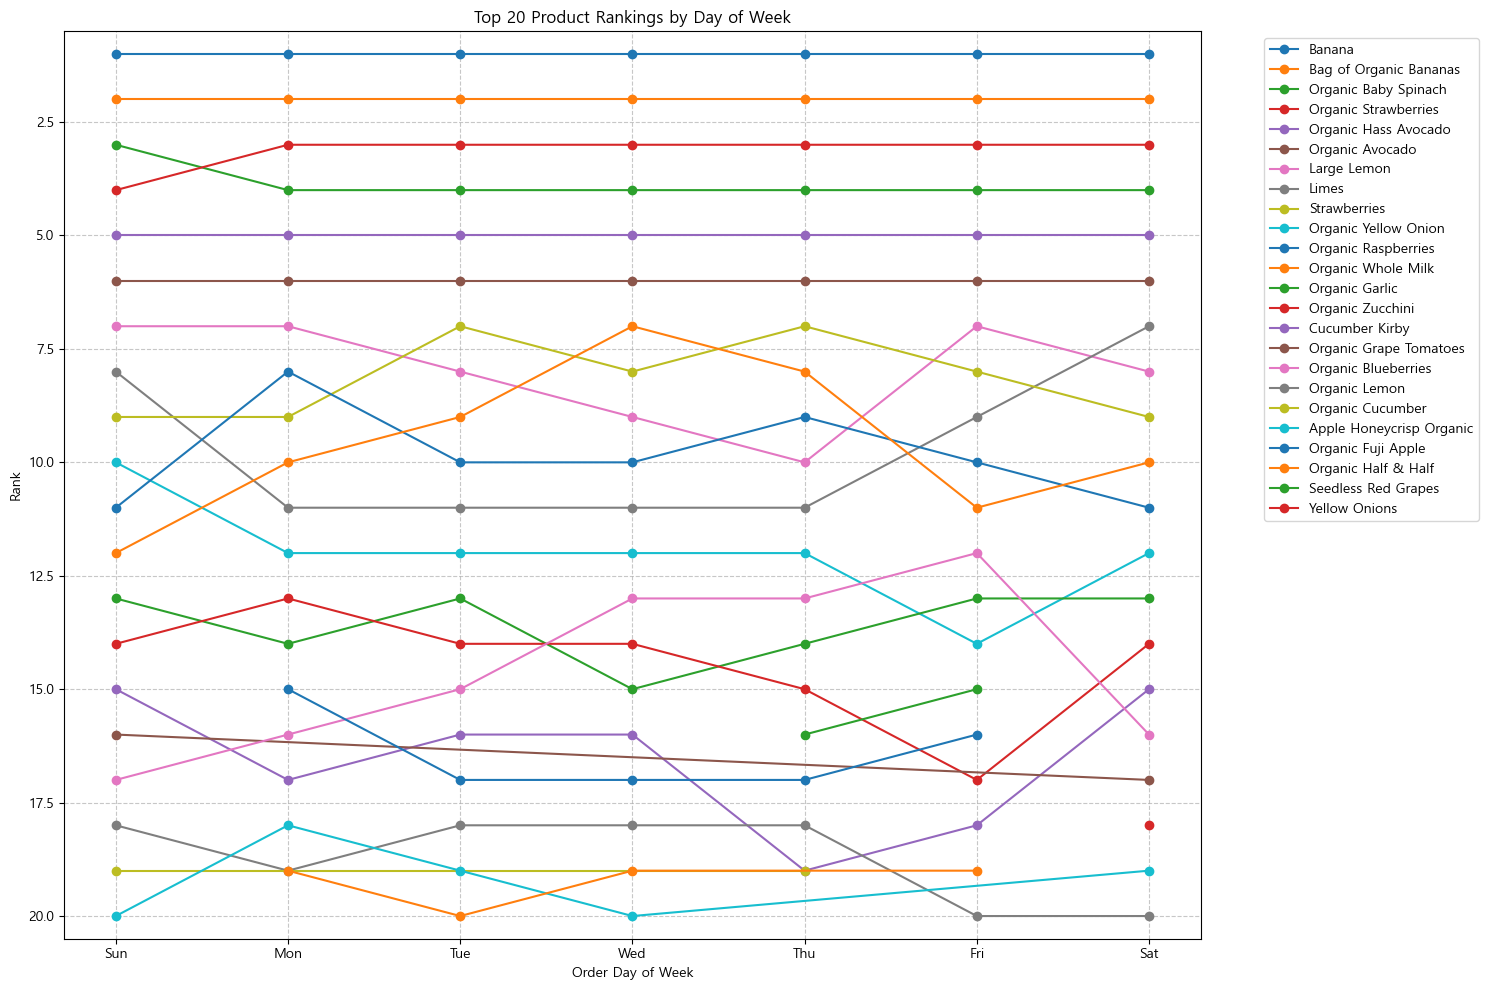

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

# 상위 20개 제품을 추출하는 함수
def get_top_20_per_day(df):
    top_20_list = []
    for dow in range(7):
        # 요일별 제품 카운트 계산
        count_df = df[df['order_dow'] == dow].groupby('product_name')['order_dow'].count().reset_index(name='count')
        top_20 = count_df.sort_values(by='count', ascending=False).head(20)
        top_20['order_dow'] = dow
        top_20_list.append(top_20)
    return pd.concat(top_20_list, ignore_index=True)

# Bump Chart를 그리기 위한 데이터 준비  # 데이터 파일 로드
top_products = get_top_20_per_day(df)

# 각 제품의 요일별 순위 계산
top_products['rank'] = top_products.groupby('order_dow')['count'].rank(method='min', ascending=False)

# Bump Chart 그리기
fig, ax = plt.subplots(figsize=(15, 10))

# 각 제품에 대해 순위 변화 선 그래프 그리기
for product in top_products['product_name'].unique():
    product_data = top_products[top_products['product_name'] == product]
    ax.plot(product_data['order_dow'], product_data['rank'], marker='o', label=product)

# 그래프 설정
ax.set_ylim(20.5, 0.5)  # y축 반전 (1위가 위로 오도록)
ax.set_xticks(range(7))
ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
ax.set_xlabel('Order Day of Week')
ax.set_ylabel('Rank')
ax.set_title('Top 20 Product Rankings by Day of Week')
ax.grid(True, linestyle='--', alpha=0.7)

# 범례 추가
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 고객 등급 별로 상관성 확인
- 고객 등급에서도 상관성 0.25로 확인 되었습니다.
- 모든 컬럼 중 그나마 가장 높은 상관성이 확인 되었습니다.
- 즉, 고객 등급이 높을 수록 재구매 확률 또한 높아지는 것을 알 수 있습니다.

In [195]:
df['category'].unique()

array(['일반 고객', '이탈 위험 고객', '잠재 우수 고객', '우수 고객', '최우수 고객', 'VIP 고객'],
      dtype=object)

In [197]:
df_replace = df.replace({'이탈 위험 고객' : 0, '일반 고객' : 1
                         , '잠재 우수 고객' : 2, '우수 고객' : 3
                         , '최우수 고객' : 4, 'VIP 고객' : 5})

C:\Users\min99\AppData\Local\Temp\ipykernel_27764\4215917270.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_replace = df.replace({'이탈 위험 고객' : 0, '일반 고객' : 1


In [203]:
from scipy.stats import pointbiserialr

def pointbiserialr_calc_2(reordered, column):
    correlation, p_value = pointbiserialr(df_replace[reordered], df_replace[column])

    print(f"{column}과 {reordered}의 포인트 바이세리얼 상관계수: {round(correlation, 6)}")
    print("p-value:", p_value)

In [207]:
pointbiserialr_calc_2('reordered', 'category')

category과 reordered의 포인트 바이세리얼 상관계수: 0.256179
p-value: 0.0


### 7일 주기

In [ ]:
out_not_7_df = out_not_df[out_not_df['days_since_prior_order'] == 7]

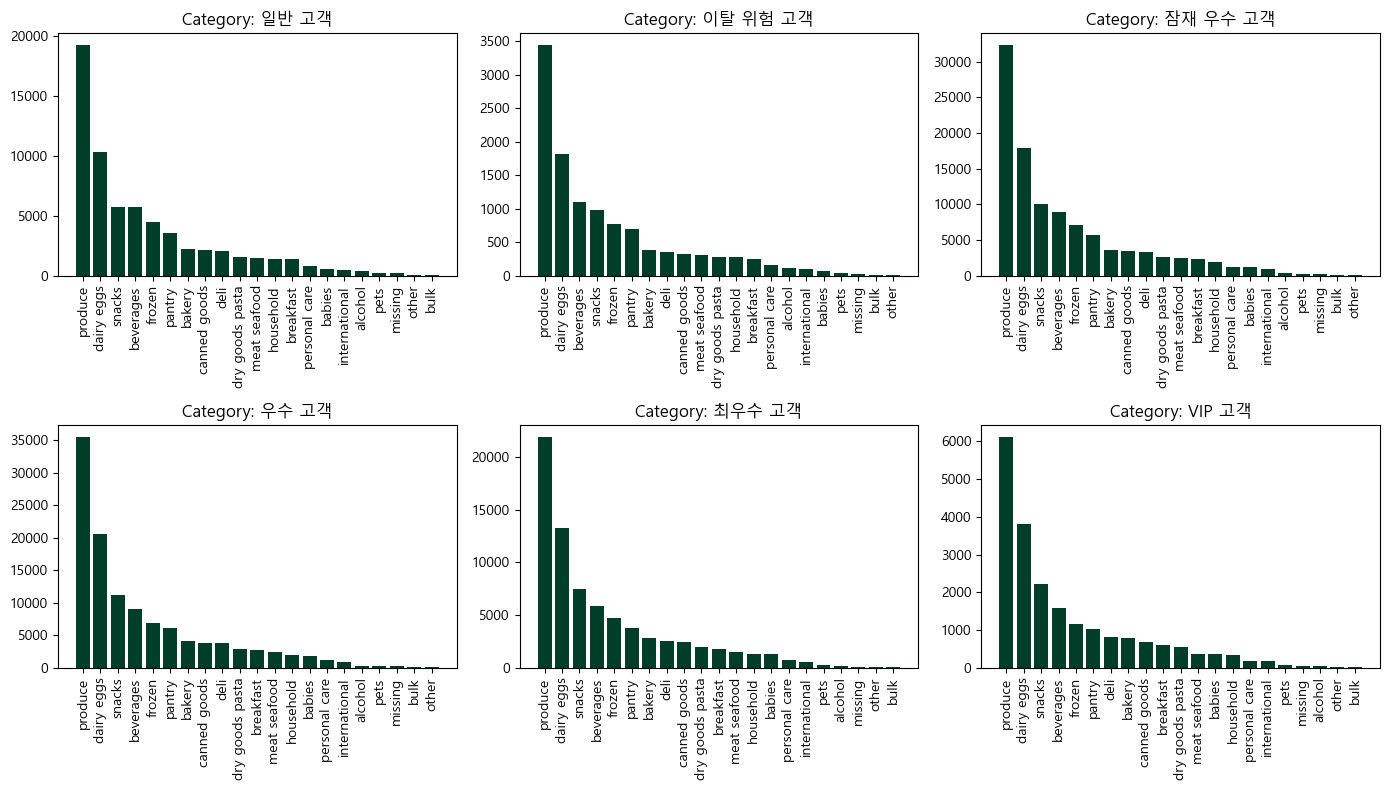

In [122]:
# 한글 폰트 설정 (맑은 고딕)
plt.rc('font', family='Malgun Gothic')

# 서브플롯 크기 설정 (3x2)
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()  # 서브플롯을 1차원 배열로 변환

# 카테고리별로 반복
for idx, i in enumerate(df['category'].unique()):

    cate_df = df[df['category'] == i]
    cate_7_df = cate_df[cate_df['days_since_prior_order'] == 7]
    cate_7_df = cate_7_df['department'].value_counts().reset_index()
    axes[idx].bar(cate_7_df['department'], cate_7_df['count'], color='#003E29', width=0.8)
    axes[idx].set_title(f'Category: {i}')
    axes[idx].tick_params(axis='x', rotation=90)

# 남은 빈 서브플롯 숨기기
for j in range(idx + 1, 6):
    axes[j].axis('off')

# 서브플롯 간 여백 조정
plt.tight_layout()
plt.show()

### 7일 주기로 사는 주요 상품들은 제거 하고 30일 이후 주기로 구매하는 물품확인

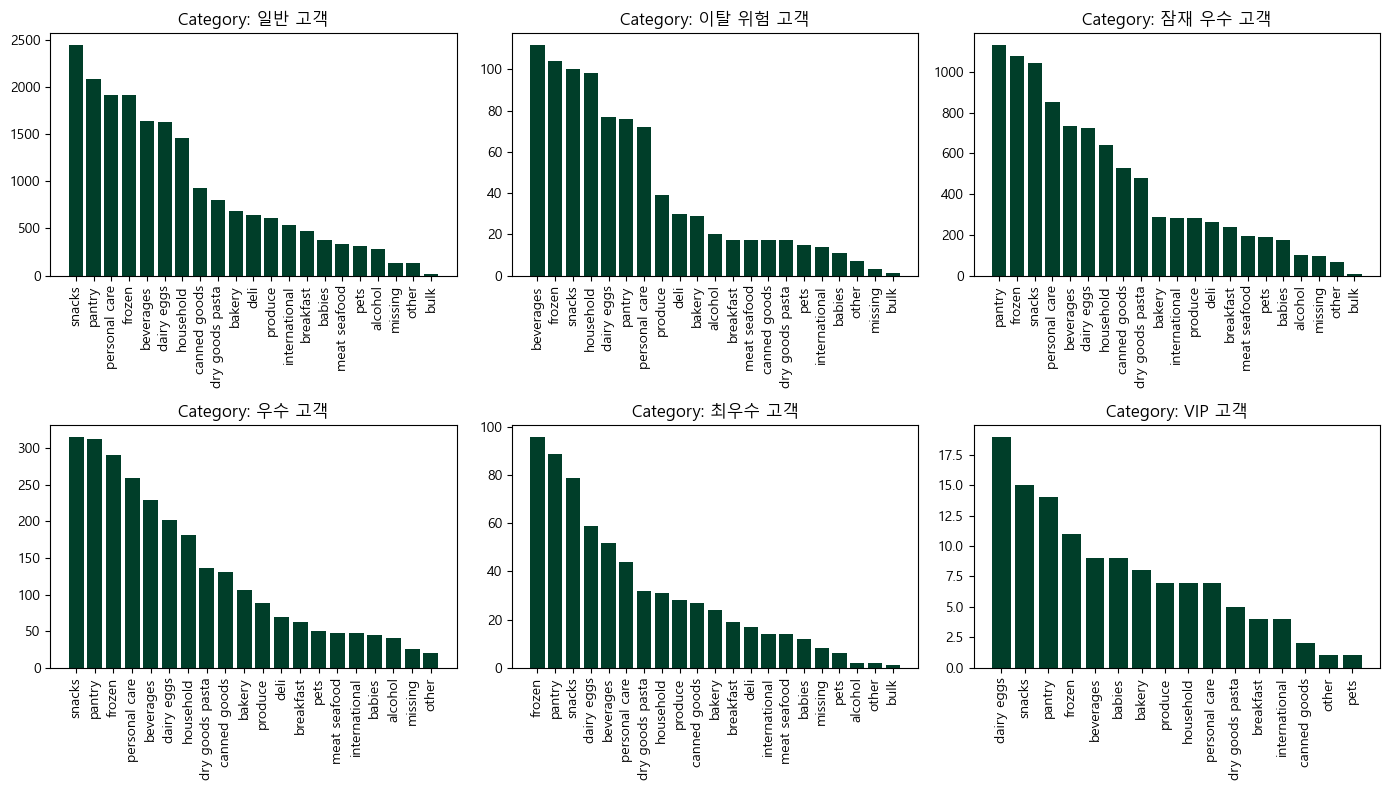

In [134]:
# 한글 폰트 설정 (맑은 고딕)
plt.rc('font', family='Malgun Gothic')

# 서브플롯 크기 설정 (3x2)
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()  # 서브플롯을 1차원 배열로 변환

# 카테고리별로 반복
for idx, i in enumerate(df['category'].unique()):

    cate_df = df[df['category'] == i]
    prior_7_df = cate_df[cate_df['days_since_prior_order'] == 7]
    prior_30_df = cate_df[cate_df['days_since_prior_order'] == 30]
    # 7일전 어떤 물품들 구매했는지
    product_list = prior_7_df.groupby('product_name')['order_id'].count().to_frame().sort_values(by='order_id', ascending=False).index.unique().tolist()
    # 30일 전 물품 중 어떤 물품 구매했는지 확인
    product_prior_30_list = prior_30_df['product_name'].unique().tolist()
    #-----------------------------------
    product_set = set(product_list)
    
    # 리스트 내포를 사용하여 필터링
    result_list = [j for j in product_prior_30_list if j not in product_set]
    #-----------------------------------
    # 30일에만 산 물품 목록
    df_item_30_only = prior_30_df[prior_30_df['product_name'].isin(result_list)]
    df_item_30_only = df_item_30_only['department'].value_counts().reset_index()
    axes[idx].bar(df_item_30_only['department'], df_item_30_only['count'], color='#003E29', width=0.8)
    axes[idx].set_title(f'Category: {i}')
    axes[idx].tick_params(axis='x', rotation=90)

# 남은 빈 서브플롯 숨기기
for j in range(idx + 1, 6):
    axes[j].axis('off')

# 서브플롯 간 여백 조정
plt.tight_layout()
plt.show()